In [125]:
import mesa

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
import networkx as nx 



sns.set(style="whitegrid")

In [111]:
class userAgent(mesa.Agent):
    
    def __init__( self, unique_id, model, d):
        
        super().__init__(unique_id, model)

        self.d = d

        self.opinion = random.uniform(0, 1) # initial opinion

        self.tendency_to_share = random.uniform(0, 1)
        self.peer_trust = random.uniform(0, 1)
        
        temp = random.uniform(0, 1)
        if temp < 1.0/3.0:
            self.risk_sensitivity = 0 # low risk sensitivity
        else:
            temp2 = random.uniform(0, 1)
            if temp2 < 0.5:
                self.risk_sensitivity = 2 # high risk sensitivity
            else:
                self.risk_sensitivity = 1 # medium risk sensitivity


    '''
    This function is for simple opinion update process using only peer trust
    ''' 
    def update_opinion_simple_Deffuant(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 

        if len(neighbors) > 0:
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            saved_opinion = self.opinion
            self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)
            other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)

         
    '''
    This function is for updating opinions using peer trust and d (only simialr agent communicate)
    ''' 
    def update_opinion_simple_Deffuant2(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 

        if len(neighbors) > 0:
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            
            if abs(self.opinion - other_agent.opinion) < self.d:
                saved_opinion = self.opinion
                self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)
                other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)
      
    
    '''
    This function is for opinion update process using peer trust - risk sensitivity 
    ''' 
    def update_opinion_Deffuant_with_risk(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 

        if len(neighbors) > 0:
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            saved_opinion = self.opinion
            
            self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)

            if self.risk_sensitivity == 0:
                self.opinion = self.opinion / 2.0
            elif self.risk_sensitivity == 2:
                self.opinion = (1.0 + self.opinion) / 2.0

            other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)

            if other_agent.risk_sensitivity == 0:
                other_agent.opinion = other_agent.opinion / 2.0
            elif other_agent.risk_sensitivity == 2:
                other_agent.opinion = (1.0 + other_agent.opinion) / 2.0
                
         
    '''
    This function is for opinion update process using risk sensitivity then peer trust
    ''' 
    def update_opinion_Deffuant_with_risk2(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 

        if len(neighbors) > 0:
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            saved_opinion = self.opinion

            if self.risk_sensitivity == 0:
                self.opinion = self.opinion / 2.0
            elif self.risk_sensitivity == 2:
                self.opinion = (1.0 + self.opinion) / 2.0

            self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)

            if other_agent.risk_sensitivity == 0:
                other_agent.opinion = other_agent.opinion / 2.0
            elif other_agent.risk_sensitivity == 2:
                other_agent.opinion = (1.0 + other_agent.opinion) / 2.0

            other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)

    
    '''
    This function is for opinion update process using peer trust - risk sensitivity 
    and only similar agent communicate (with d)
    ''' 
    def update_opinion_Deffuant_with_risk_and_d(self):
        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 

        if len(neighbors) > 0:
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            
            if abs(self.opinion - other_agent.opinion) < self.d:
                saved_opinion = self.opinion
                self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)

                if self.risk_sensitivity == 0:
                    self.opinion = self.opinion / 2.0
                elif self.risk_sensitivity == 2:
                    self.opinion = (1.0 + self.opinion) / 2.0

                other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)

                if other_agent.risk_sensitivity == 0:
                    other_agent.opinion = other_agent.opinion / 2.0
                elif other_agent.risk_sensitivity == 2:
                    other_agent.opinion = (1.0 + other_agent.opinion) / 2.0
    
    
    '''
    This function is for opinion update process using all agent varibales 
    (peer trust - risk sensitivity - tendency to share)
    '''
    def update_opinion_Deffuant_with_R_and_B(self):

        neighbors = self.model.grid.get_neighborhood(self.pos, include_center = False) 
        if len(neighbors) > 0:
            
            other_agent = self.random.choice(self.model.grid.get_cell_list_contents(neighbors))
            saved_opinion = self.opinion

            # other agent speek
            speak_prob = other_agent.opinion ** (1.0 / other_agent.tendency_to_share)
            if random.uniform(0, 1) < speak_prob:
                self.opinion = self.opinion + self.peer_trust * (other_agent.opinion - self.opinion)

                if self.risk_sensitivity == 0:
                    self.opinion = self.opinion / 2.0
                elif self.risk_sensitivity == 2:
                    self.opinion = (1.0 + self.opinion) / 2.0


            # current agent speek
            speak_prob = self.opinion ** (1.0 / self.tendency_to_share)
            if random.uniform(0, 1) < speak_prob:
                other_agent.opinion = other_agent.opinion + other_agent.peer_trust * (saved_opinion - other_agent.opinion)

                if other_agent.risk_sensitivity == 0:
                    other_agent.opinion = other_agent.opinion / 2.0
                elif other_agent.risk_sensitivity == 2:
                    other_agent.opinion = (1.0 + other_agent.opinion) / 2.0

            
    def step(self):
        self.update_opinion_simple_Deffuant() ## only P
        
#         self.update_opinion_simple_Deffuant2() ## P and d
        
#         self.update_opinion_Deffuant_with_risk() ## P then R
        
#         self.update_opinion_Deffuant_with_risk2() ## R then P 
        
#         self.update_opinion_Deffuant_with_risk_and_d() ## P then R + d
        
        
#####################################################


def opinion_avg(model):
    return sum(a.opinion for a in model.grid.get_all_cell_contents())/model.num_agents

def tendency_to_share_avg(model):
    return sum(a.tendency_to_share for a in model.grid.get_all_cell_contents())/model.num_agents

def risk_avg(model):
    return sum(a.risk_sensitivity for a in model.grid.get_all_cell_contents())/model.num_agents

def peer_trust_avg(model):
    return sum(a.peer_trust for a in model.grid.get_all_cell_contents())/model.num_agents

#####################################################

class opinionsModel(mesa.Model):
    
    def __init__(self, N = 100 , d = 0):
      
        self.num_agents = N
        self.d = d

        self.G = nx.complete_graph(n = self.num_agents)
        self.datacollector = mesa.DataCollector(
            model_reporters = {
                "op_avg": opinion_avg,
                "risk_avg" : risk_avg,
                "tendency_to_share_avg" : tendency_to_share_avg, 
                "peer_trust_avg" : peer_trust_avg,
            },
            agent_reporters = {
                "opinion" : "opinion", 
                "risk_sensitivity" : "risk_sensitivity",
                "tendency_to_share" : "tendency_to_share",
                "peer_trust" : "peer_trust",
            }
        )

        self.grid = mesa.space.NetworkGrid(self.G)
        self.schedule = mesa.time.RandomActivation(self)

        for i, node in enumerate(self.G.nodes()):           
            a = userAgent(i, self, d)
            self.schedule.add(a)
            self.grid.place_agent(a, node)
            
        self.datacollector.collect(self)

        
    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)
        

## 1. The model with only Peer trust 

**Calling the function: update_opinion_simple_Deffuant()**

This case is similar to the Deffuant model with d = 1, as all there is no condition for updating the opinions and when a pair of agents is selected they will go through updating opinion process. 

The difference here is with useing peer trust instead of the converegnce paramter m. In Deffuant model, the parameter m is a constant value for all agents and it is always between 0 and 0.5. While in this version of the model each agent has its own value of the the peer trust, and it is between 0 and 1

In [56]:
model = opinionsModel(N = 500)

In [57]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

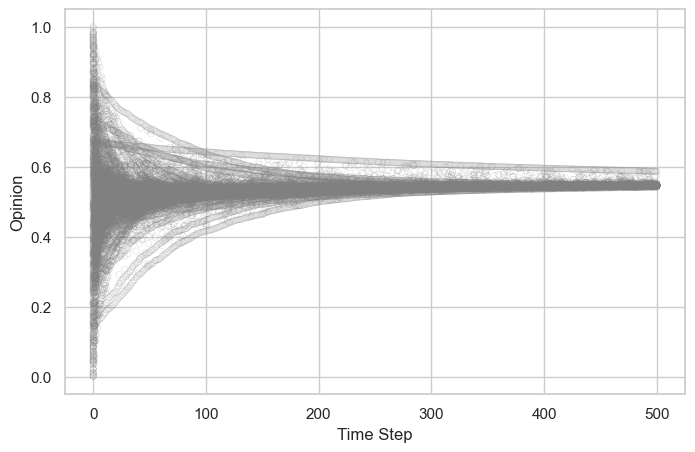

In [58]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor='grey', alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

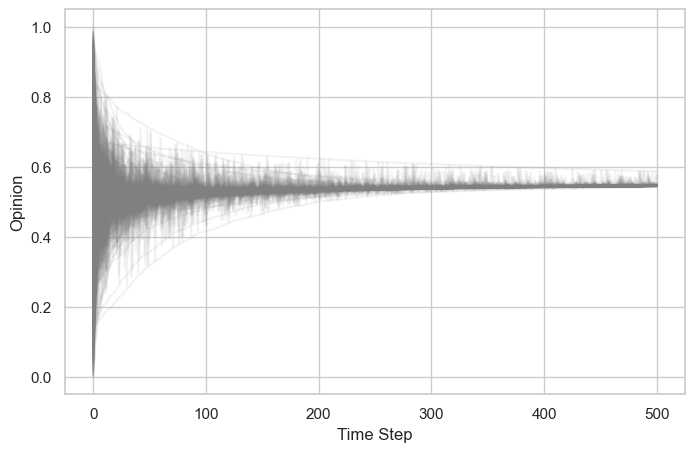

In [59]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:
It is taking longer time to convereg, and even after 500 steps the model didn't reach converegnce.

This is caused by the different values each agent have for the peer trust (which is equevalent to the converegnce paramater m in terms of the role in the update opinion equation - amplifying or reducing the value used to update the opinion). 

### Changed the range of peer trust to 0 and 0.5

In [61]:
model = opinionsModel(N = 500)

In [62]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
# model_data = model.datacollector.get_model_vars_dataframe()
agents_data = model.datacollector.get_agent_vars_dataframe()

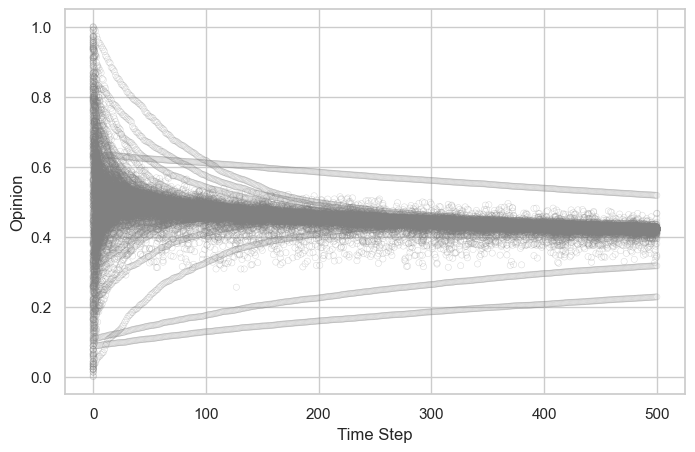

In [63]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor='grey', alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

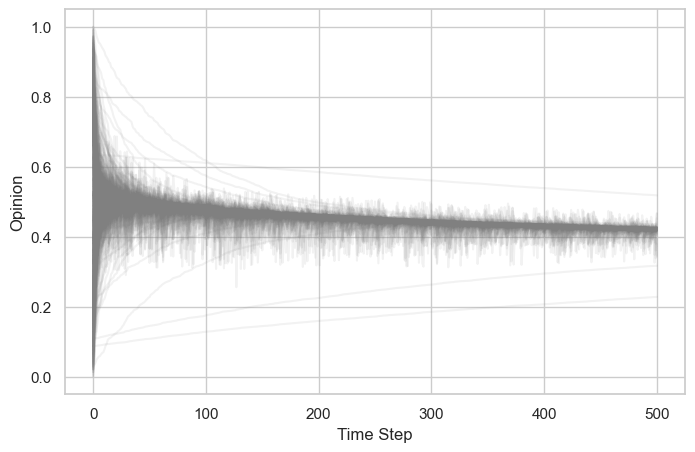

In [64]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:

setting the peer trust to a range between 0 and 1 will cause the model to take slower time to come close to convergence , because in the prev case 50% of the agents has highst values for the covergence paramter in the equation so their opinions will get updated (ampliffied or reduced) by larger values. While in this case, all agents have convergence parameter between 0 and 0.5, so it will cause updating the opinion my smaller values.

## 2. Peer Trust + Risk sensitivty

**Calling the function: update_opinion_Deffuant_with_risk()**


In [5]:
model = opinionsModel(N = 500)

In [6]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

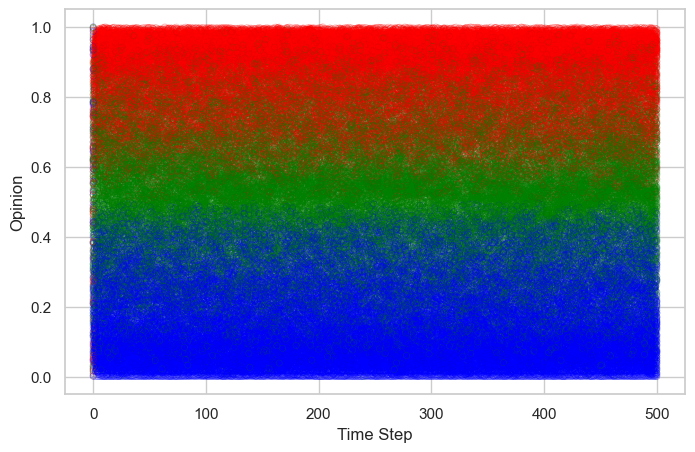

In [7]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

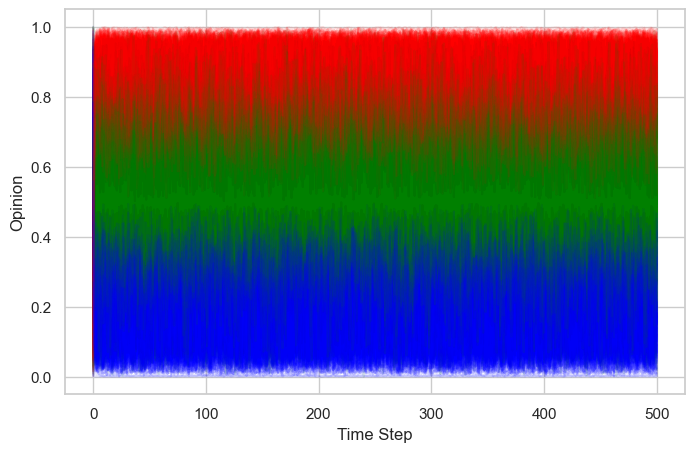

In [8]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

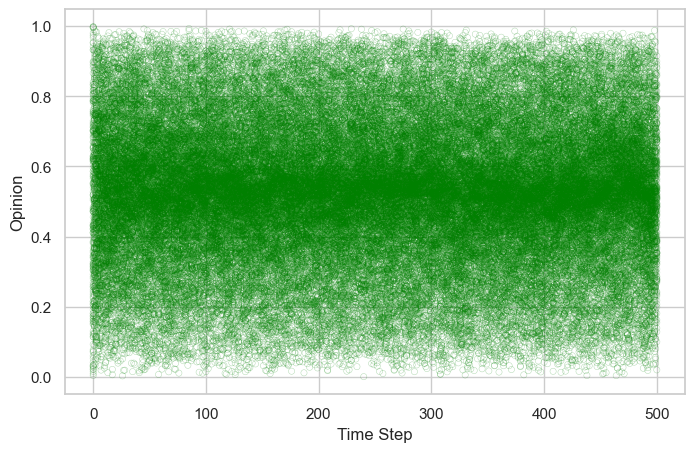

In [9]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
#         sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

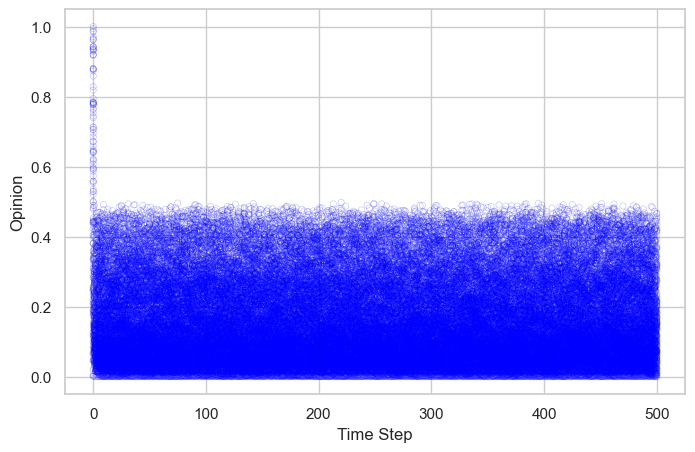

In [10]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

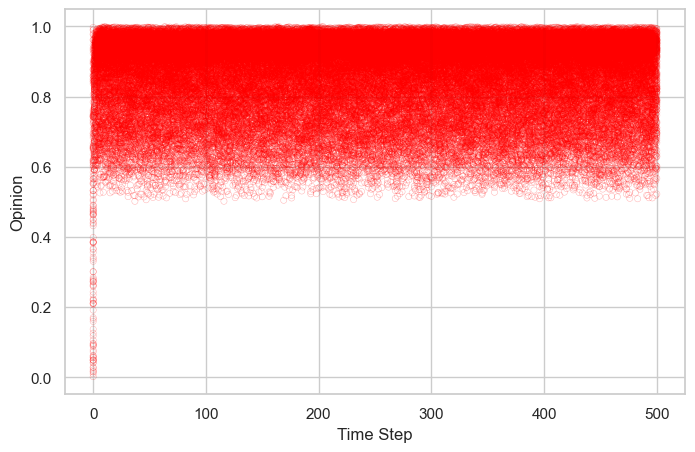

In [11]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
#         sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

## 3. Risk sensitivty then Peer Trust (changing the order)

**Calling the function: update_opinion_Deffuant_with_risk2()**


In [152]:
model = opinionsModel(N = 500)

In [153]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

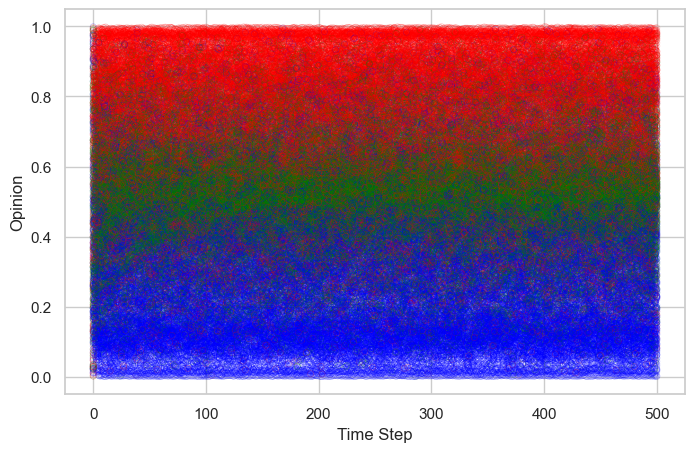

In [154]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

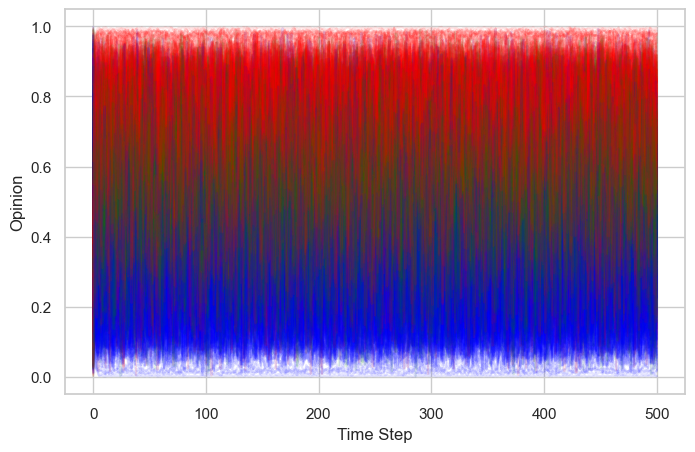

In [155]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

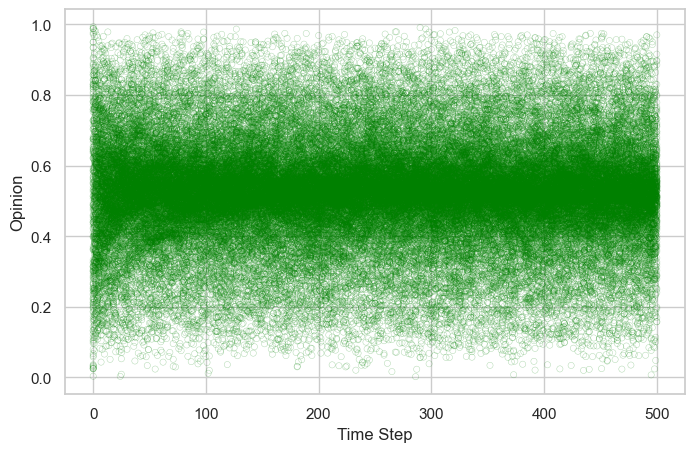

In [156]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

## more invitigation

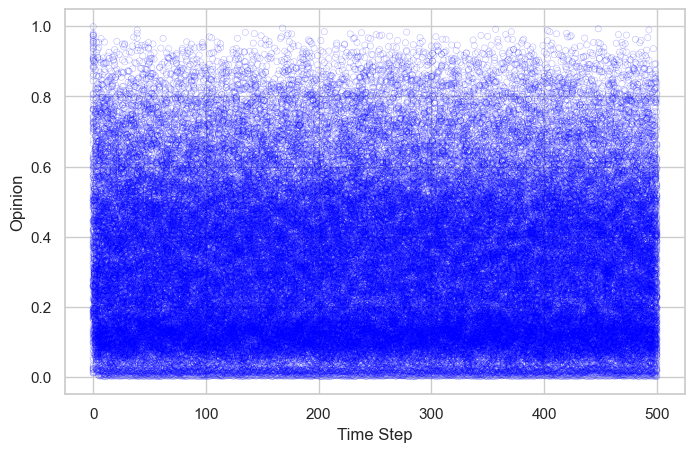

In [157]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

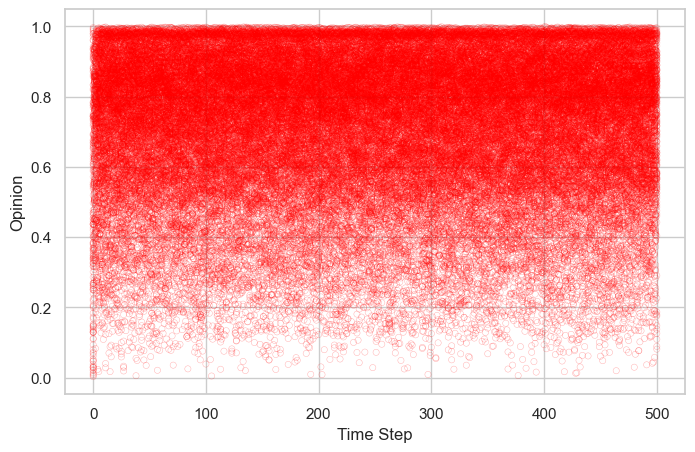

In [158]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:

- in the case of adding risk sensitvity as a 2nd step, alarmist agents will always adopt a final opinion above 0.5 while agents with R = 0 will adopt opinions bellow 0.5. While adding it as a 1st step will cause the opinions be more distributed with high density at one of the ends.
- because of the constant ampplification or reduction of opinions in step 2 for R = 0 and 2, the model will never reach convergence at 1 value for these groups.
- which makes having the risk sensitivty the second step make more sense. **(is it ?? Needs proper justification)**
- in the case of neutural agents (R = 1), changing the order of steps doesn't make a difference because their opinions will never be processes beyond the equation 1. Thats why these agents will adopt opinions closer to 0.5 (which is the value that the model converge to in case of no R). 
- But I am still not sure why this case does not show a behavior closer to the case with no R at all (the one with only peer trust) - I even tried to increase the steps to 1000 and increase the size of the population as I wanted to find out if the case of neutral agents will become closer to converegnce or not, but the result didn't change. **(found the reason in the next notebook)**


## 4. only similar agents communicate (d = 0.5) - No R

here I am adding the same condition of Deffuant model where only agents only simmilar opinions (different in opinions is less than d ) can communicate. I will test out this scenario with and without risk sensitivty.

In [208]:
model = opinionsModel(N = 500, d = 0.5)

In [209]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

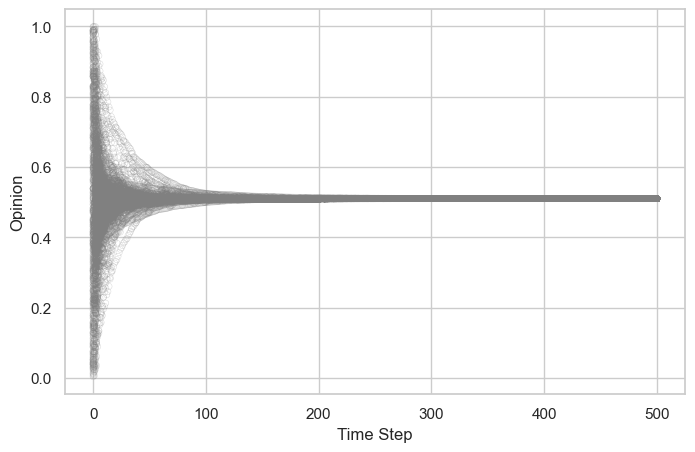

In [210]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor='grey', alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

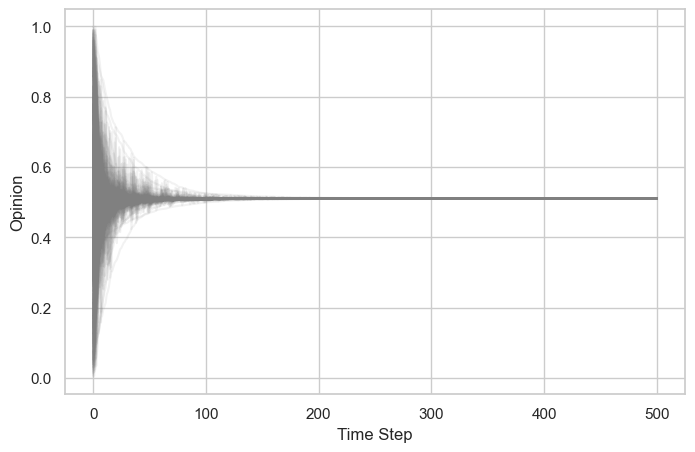

In [211]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = 'grey' , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:

- This case reached convergence faster than when there is no agents simmilarity check.
- it is showing similar behavior to the original defuant model
- in the prev case (only peer trust), even though the all opinions are getting closer to converegnce, but it didn't actually converge after 500 steps.

## 5. only similar agents communicate (d = 0.2) - No R

here I am reducing the threshold of similarity in opinions to 0.2, to see if I will get a seperation of 2 groups as in the original Defuant model. I am distinguishing the agents by their initial opinions into to groups:
- red = initial opinion < 0.5
- green = initial opinion >= 0.5

In [215]:
model = opinionsModel(N = 500, d = 0.2)

In [216]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

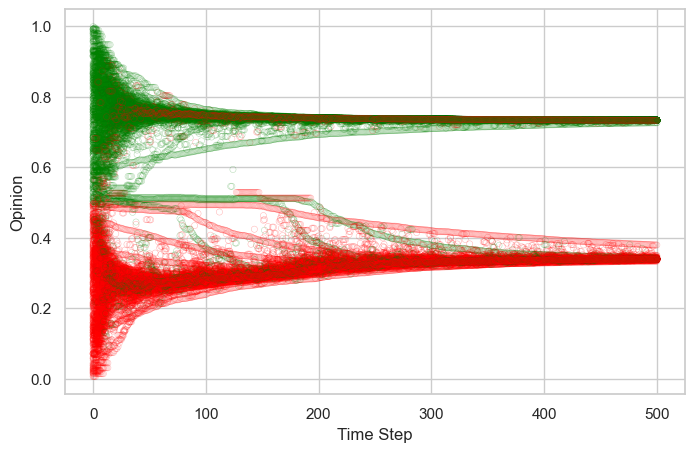

In [234]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['opinion'])[0] >= 0.5:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['opinion'])[0] < 0.5:
        c = 'red'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

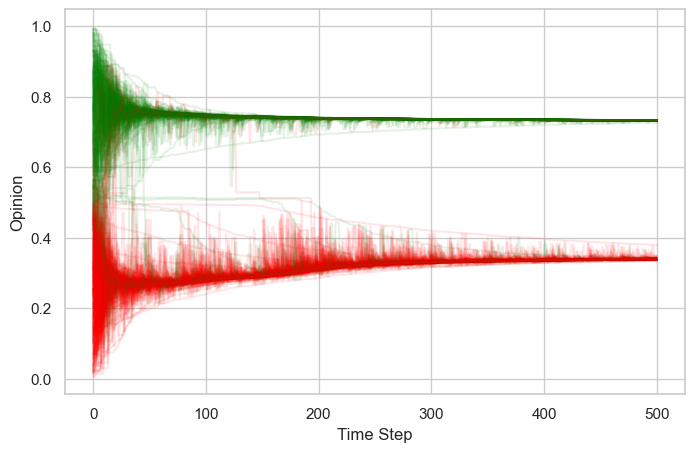

In [236]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['opinion'])[0] >= 0.5:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['opinion'])[0] < 0.5:
        c = 'red'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

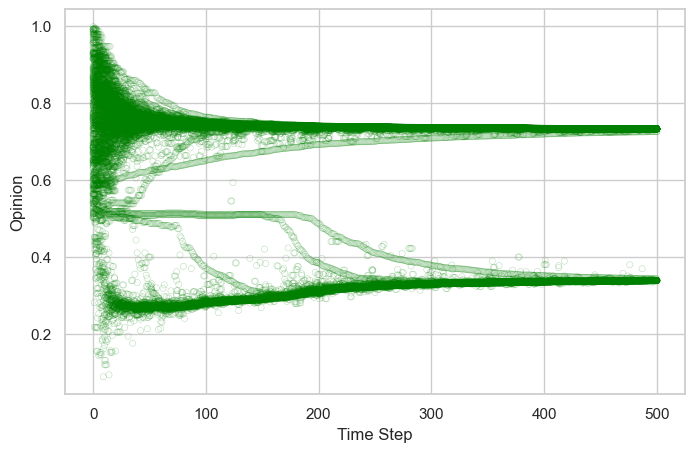

In [237]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['opinion'])[0] >= 0.5:
        c = 'green'
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

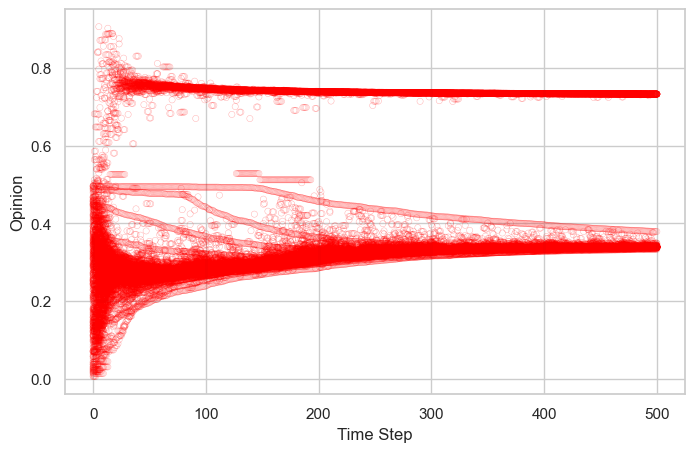

In [238]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['opinion'])[0] < 0.5:
        c = 'red'
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

## more invitigation

### Zooming in to the first 50 steps
In order to compare it with the plot of Defualt model

In [246]:
sub_data = agents_data.query('Step <= 50')

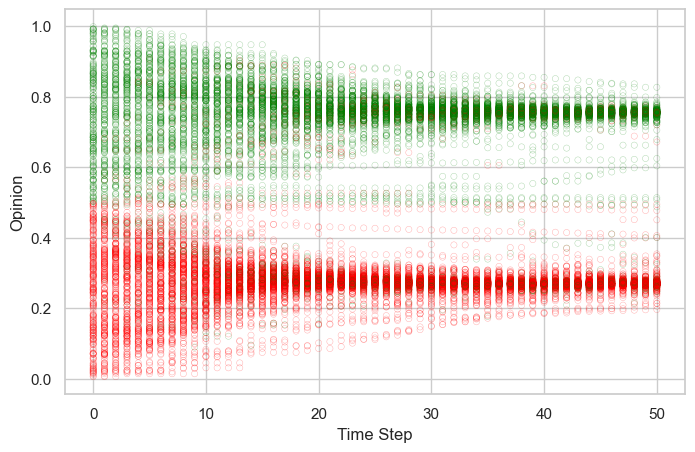

In [247]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(sub_data.query(f"AgentID == {i}")['opinion'])[0] >= 0.5:
        c = 'green'
    elif list(sub_data.query(f"AgentID == {i}")['opinion'])[0] < 0.5:
        c = 'red'
    sns.scatterplot(x = "Step", y = "opinion", data = sub_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

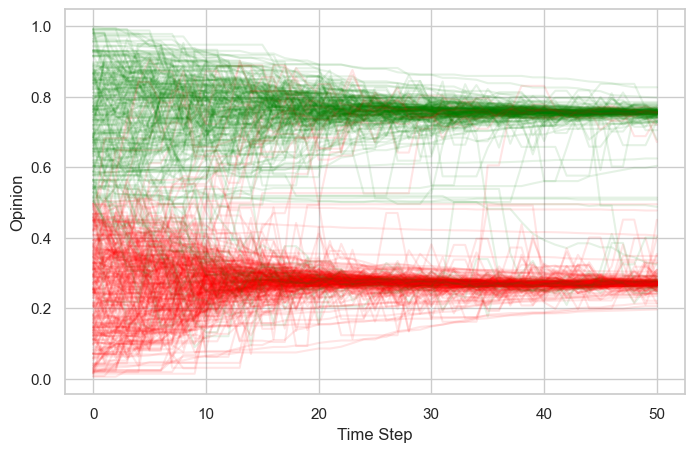

In [248]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(sub_data.query(f"AgentID == {i}")['opinion'])[0] >= 0.5:
        c = 'green'
    elif list(sub_data.query(f"AgentID == {i}")['opinion'])[0] < 0.5:
        c = 'red'
    sns.lineplot(x = "Step", y = "opinion", data = sub_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:

I got kind of the same results as the agents ended up creating 2 groups of converged opinions. 
But I noticed that some red agents will end up in the green area and vice versa, 

after invistigating a smaller group I concluded that: **the 2 way update process (both agents go through update opinions process) will cause an individual agent to go through several update processes per time step (as it might get selected as a nighbor for multiple agents).**

So I tried Changing the update process to 1 way but that didn't change the case .. This means even with one update process per agent per time step, some agents might move their opinions from low to high and vice versa depending on who they are being communicating with



## 6. only similar agents communicate (d = 0.5) - with R

I added risk sensitivity as the 2nd step in the opinion update process

In [250]:
model = opinionsModel(N = 500, d = 0.5)

In [251]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

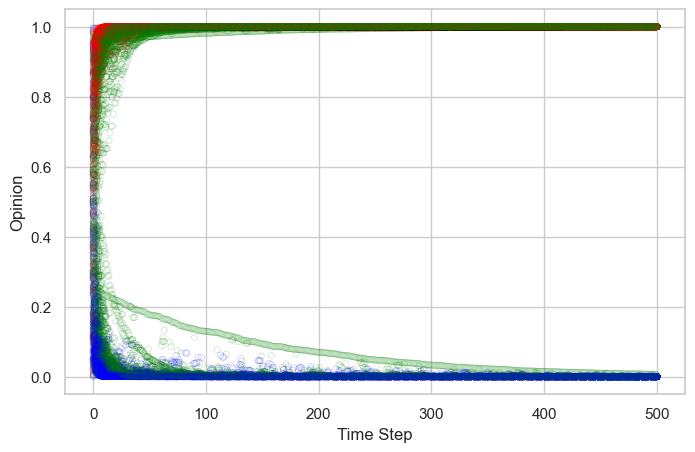

In [254]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

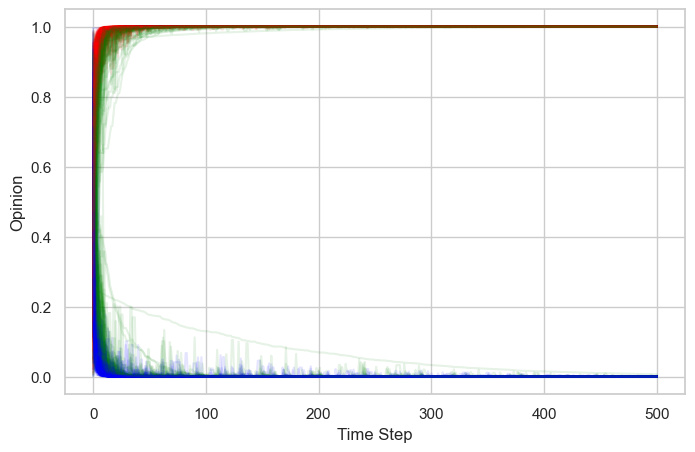

In [255]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

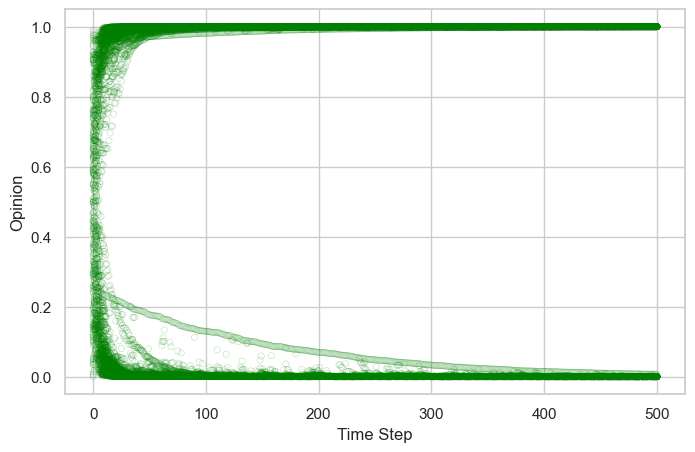

In [256]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

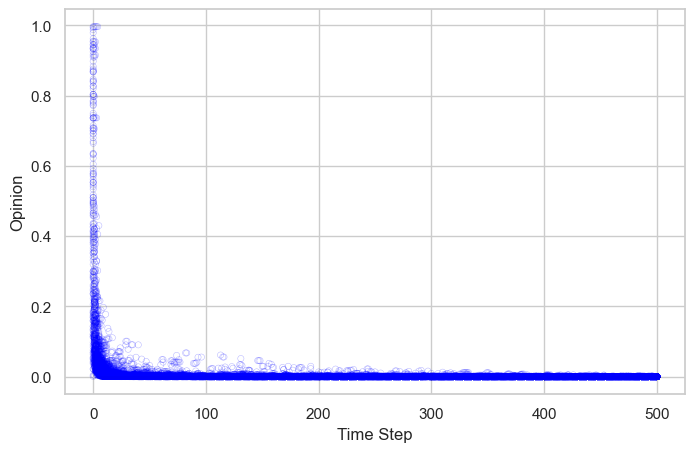

In [257]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

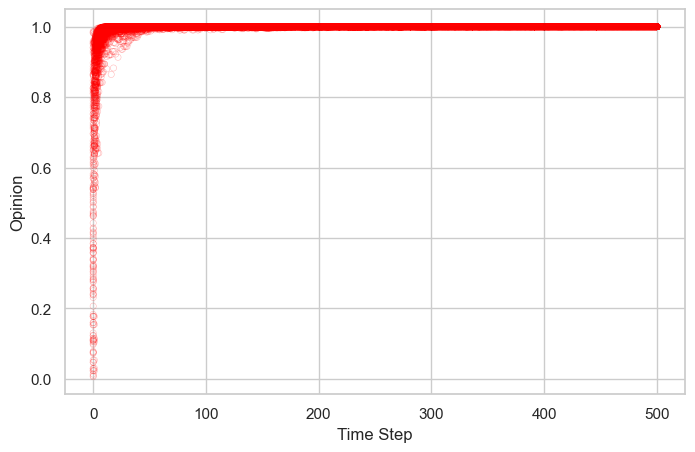

In [258]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

## 7. only similar agents communicate (d = 0.8) - with R


In [259]:
model = opinionsModel(N = 500, d = 0.8)

In [260]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

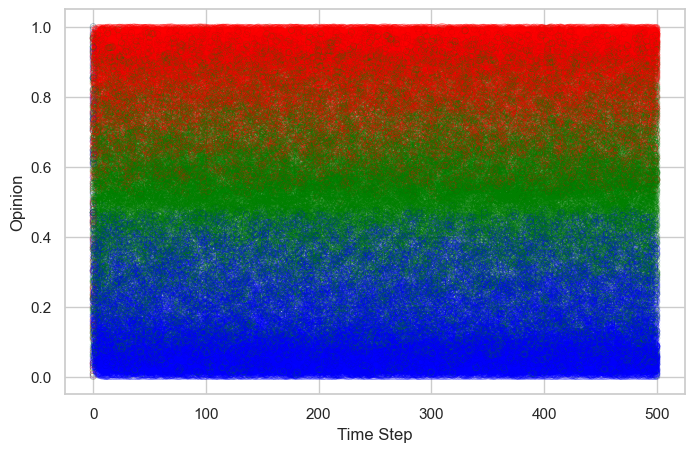

In [261]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

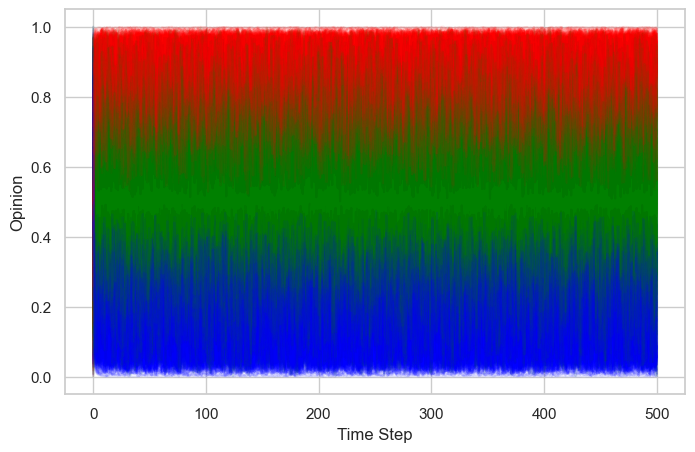

In [262]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

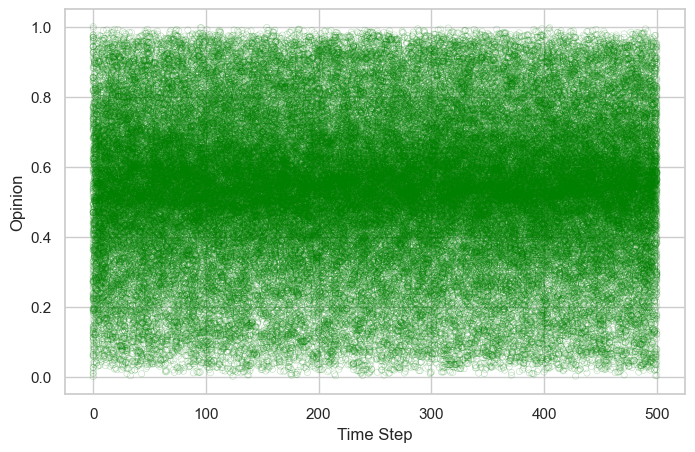

In [263]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

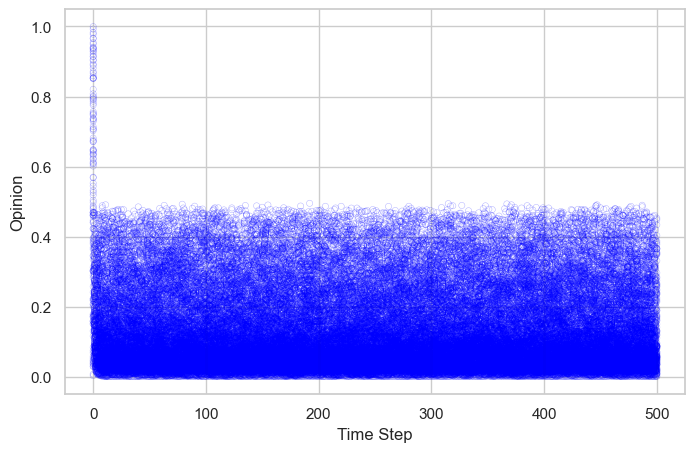

In [264]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

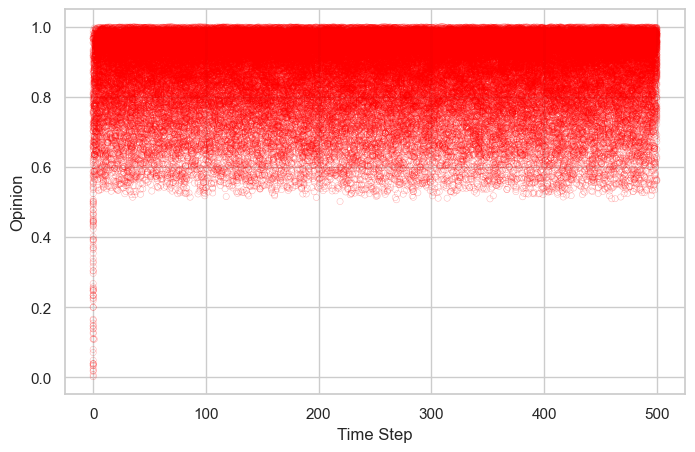

In [265]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

## 8. only similar agents communicate (d = 0.2) - with R

I added risk sensitivity as the 2nd step in the opinion update process

In [266]:
model = opinionsModel(N = 500, d = 0.2)

In [267]:
num_steps = 500 
for _ in range(num_steps):
    model.step()
    
agents_data = model.datacollector.get_agent_vars_dataframe()

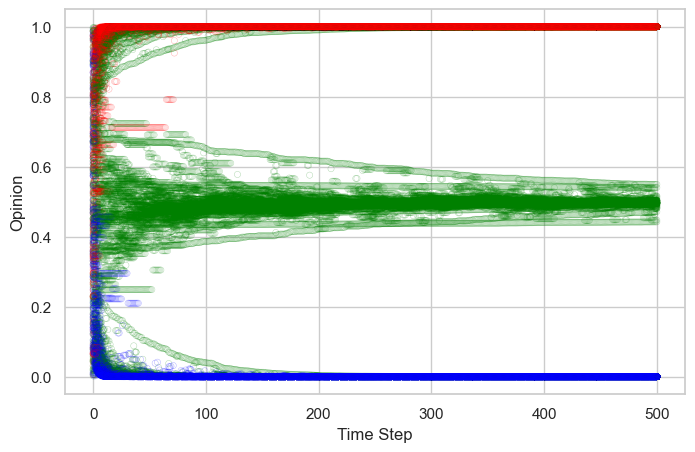

In [268]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

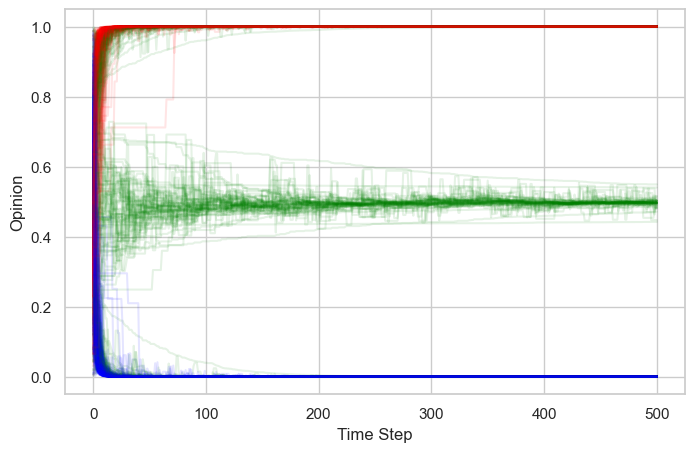

In [269]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
    elif list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
    sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

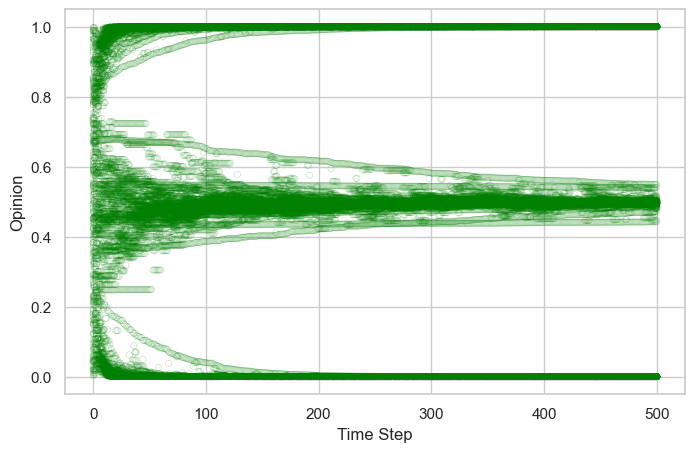

In [270]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 1:
        c = 'green'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

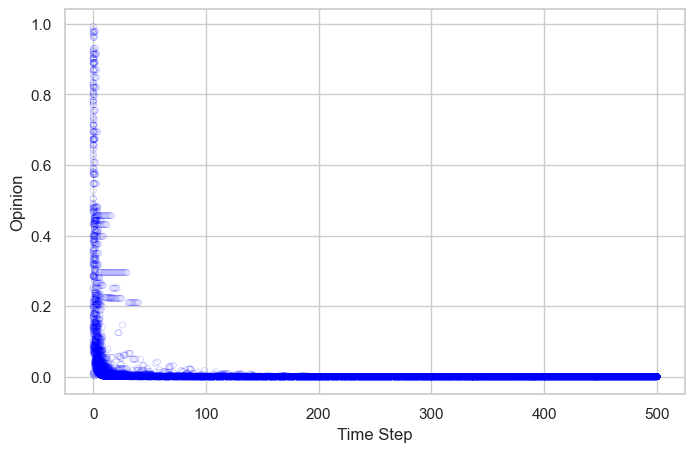

In [271]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 0:
        c = 'blue'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

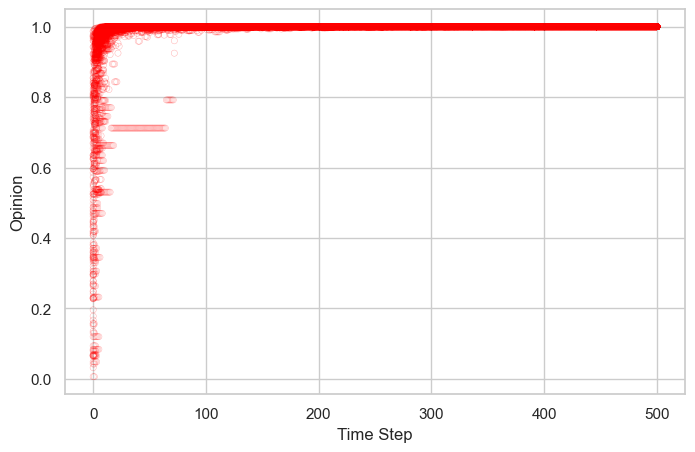

In [272]:
plt.figure(figsize=(8,  5))

for i in range(model.num_agents):
    if list(agents_data.query(f"AgentID == {i}")['risk_sensitivity'])[0] == 2:
        c = 'red'
        #sns.lineplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), color = c , alpha = 0.1)
        sns.scatterplot(x = "Step", y = "opinion", data = agents_data.query(f"AgentID == {i}"), marker='o', s=20, facecolor='none', edgecolor=c, alpha = 0.3)

plt.xlabel("Time Step")
plt.ylabel("Opinion")
plt.show()

### Findings:

- when d = 0.8 (large value) -> the model showed a simmilar behavior to the model with no d. which means the bigger the opinion difference, the larger the resultant updated opinions we get, causing the model to be in constant change and no approaching convergence.

- d = 0.5 caused the agents to be devided into to groups where alarmist and non-alarmist agents will never come into contact, while netural agent will end up in eathir groups. 

- smaller d values (d = 0.2) caused only some netural agent to communicate with the other groups, while the rest endded up only contacting with other netural agents, which resulted in having a third group approaching convergence near 0.5. 

- Conclusion: I am considering adding such simmilarity condition into my model, I think it is a good representation of the relationships in social media paltforms as a user will be consuming a contect that matches its interest based on it following or its history.  

## 9. Adding Tendency to share